<a href="https://colab.research.google.com/github/Jenishk16/oil-shock-impact-on-stocks/blob/main/Oil_and_stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Impact of Crude oil prices on various stocks from different sectors (Airline,Paint, Upstream Oil suppliers, Oil refiners, Petrochem)**

**Objective**


*   How does Oil price movement affect this stocks?
*   Is there any specific pattern in the stocks returns and Oil returns?
*   What are the short- and long-term sensitivities of these equities to oil
    shocks?





In [33]:
# Data Setup
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from datetime import datetime
pd.set_option("display.max_columns", None)

oil_ticker = "CL=F"   # WTI Crude Oil Futures (Yahoo Finance symbol)
stocks = ["ASIANPAINT.BO", "ONGC.NS", "IOC.BO","INDIGO.BO","SRF.BO"]  # Stocks from various industries
market_index = "^NSEI"  # Nifty 50 for control

start_date = "2015-01-01"
end_date = datetime.today().strftime("%Y-%m-%d")

tickers = stocks + [oil_ticker, market_index]
data = yf.download(tickers, start=start_date, end=end_date)["Close"]


# Computing daily returns from closing prices
returns = data.pct_change().dropna()
returns.rename(columns={oil_ticker: "Oil", market_index: "Nifty50"}, inplace=True)

returns.head()

/tmp/ipython-input-1853901381.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)["Close"]
[*********************100%***********************]  7 of 7 completed
/tmp/ipython-input-1853901381.py:23: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()


Ticker,ASIANPAINT.BO,Oil,INDIGO.BO,IOC.BO,ONGC.NS,SRF.BO,Nifty50
Date,,,,,,,
2015-11-11,0.000000,-0.028953,0.000000,0.000000,0.000000,0.000000,0.000000
2015-11-12,0.000000,-0.027487,0.000000,0.000000,0.000000,0.000000,0.000000
2015-11-13,0.002380,-0.024192,0.142068,0.022072,-0.032953,-0.032801,-0.002711
2015-11-16,0.002125,0.024546,-0.015599,-0.013129,0.005461,0.031301,0.005714
2015-11-17,0.006423,-0.025635,0.048096,-0.006465,0.009559,0.014562,0.003965


Explotory data analysis

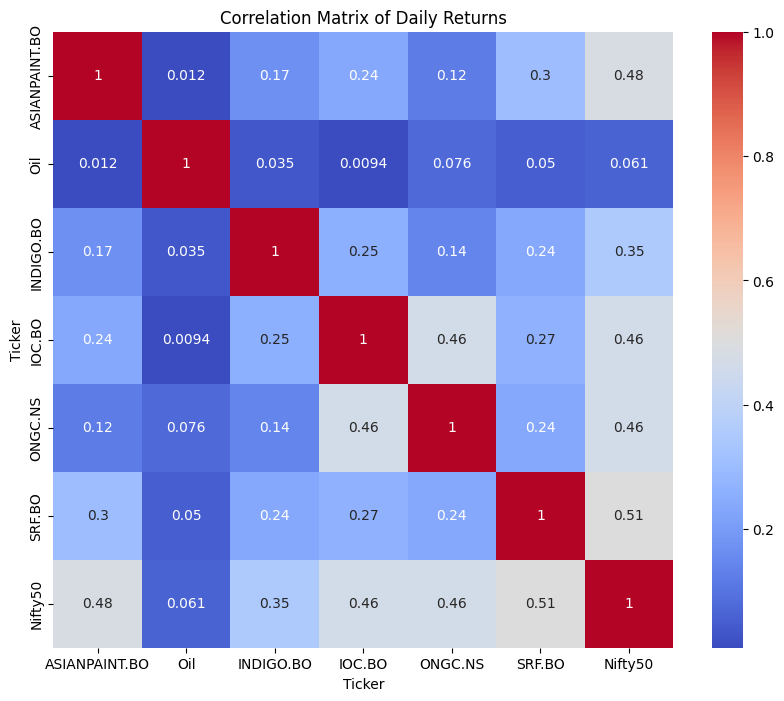

In [34]:
# Correlation Heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(returns.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Daily Returns")
plt.show()


*  Above graph suggest that overall correlation with Oil price is low.
*  ONGC has highest correlation with Oil price returns, followed by Nifty50 and
   SRF.
*  IOC has lowest correlation.



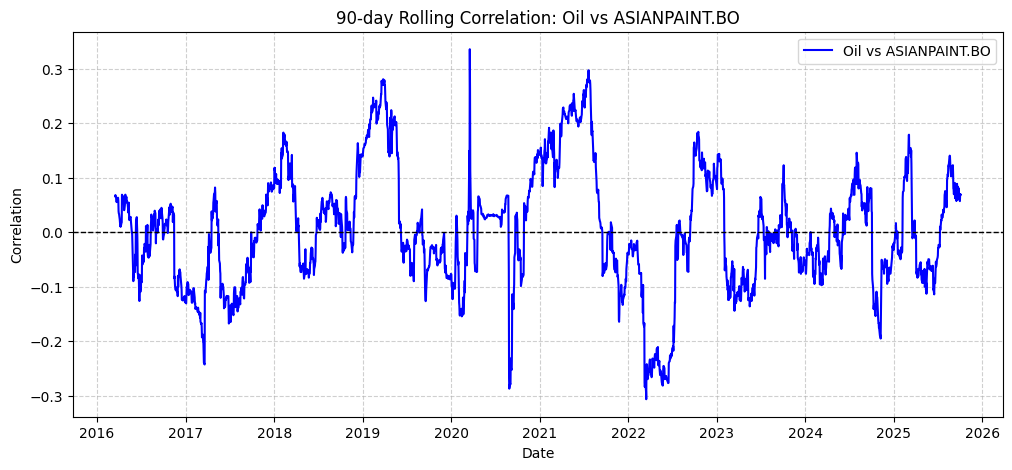

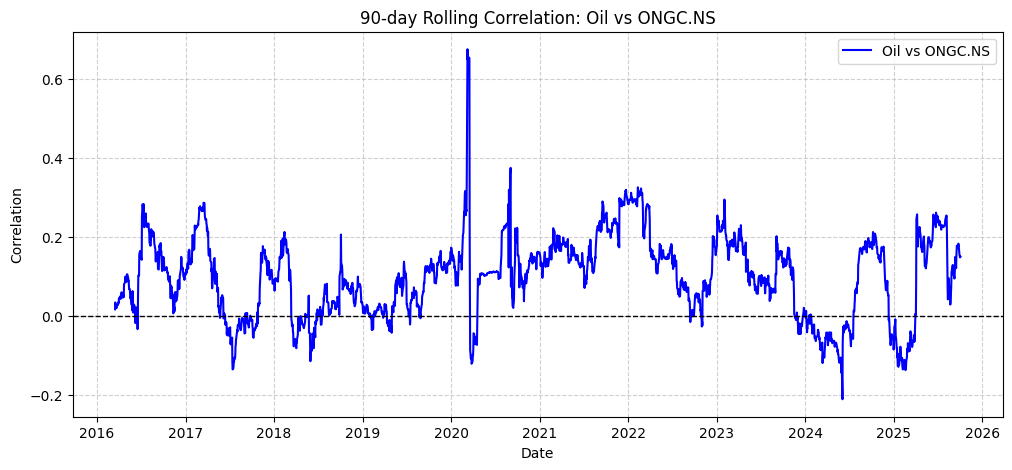

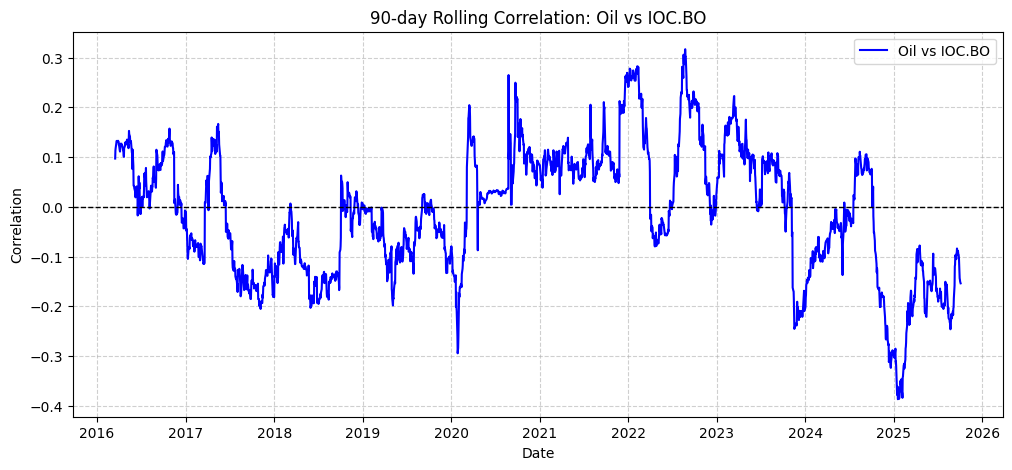

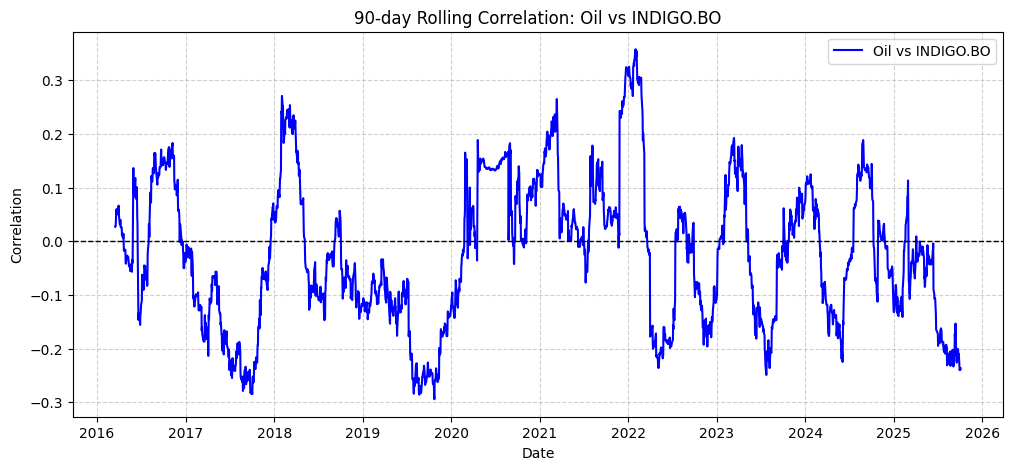

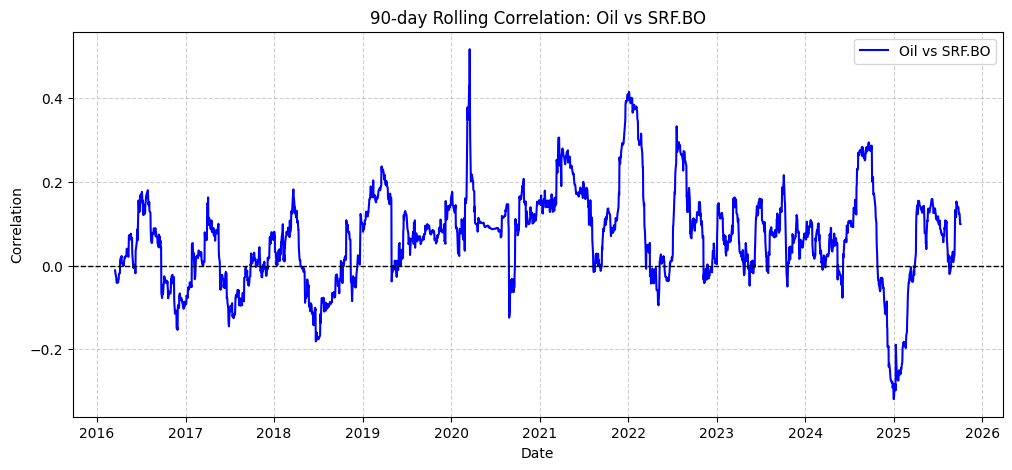

In [35]:
# Rolling Correlation - To check how things evolve over time
rolling_corr = returns[['Oil']].join(returns[stocks]).rolling(90).corr().dropna() #taking returns of oil and joining with returns of stocks on 90 days basic for corr

for stock in stocks:
  # Extract Oil vs Stock correlation series
  corr_series = rolling_corr.xs('Oil', level=1)[stock]

  #plot
  plt.figure(figsize=(12, 5))
  plt.plot(corr_series.index, corr_series, label=f'Oil vs {stock}', color='blue')
  plt.axhline(0, color='black', linestyle='--', linewidth=1)  # baseline at 0
  plt.title(f'90-day Rolling Correlation: Oil vs {stock}')
  plt.xlabel('Date')
  plt.ylabel('Correlation')
  plt.legend()
  plt.grid(True, linestyle='--', alpha=0.6)
  plt.show()

*   Correlation in all stocks flactuate very significantly
*   ONGC shows good amount of +ve correlation
*   SRF also shows +ve correlation over the years

### Event Shock in Oil Market (Covid-19 and Russia-Ukraine War)

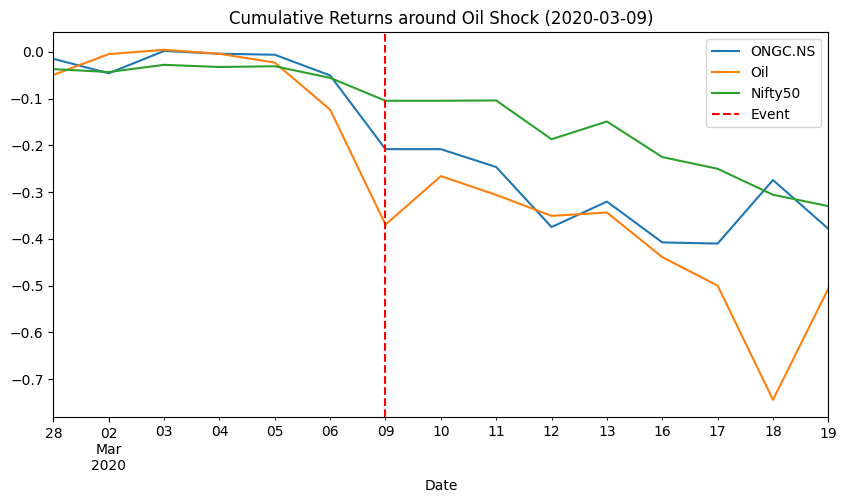

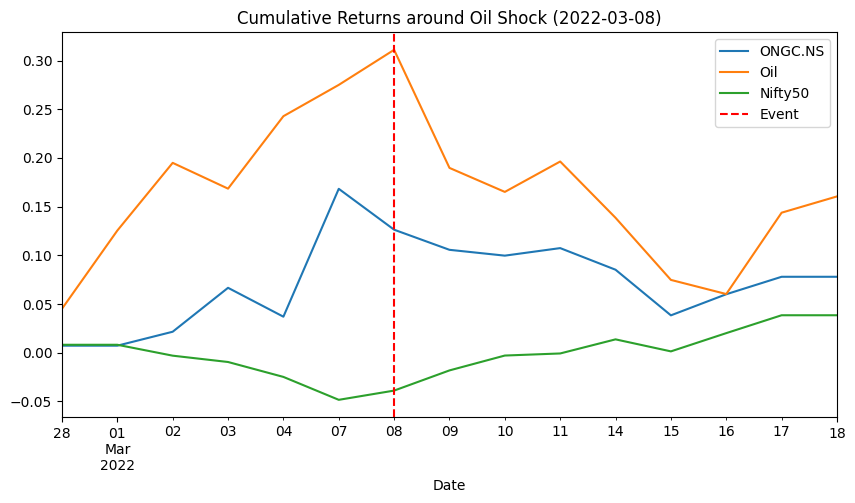

In [36]:
#ONGC
event_dates = ["2020-03-09", "2022-03-08"]
window = 10

for event in event_dates:
    event = pd.to_datetime(event)
    window_data = returns.loc[event - pd.Timedelta(days=window):
                              event + pd.Timedelta(days=window), ["ONGC.NS", "Oil","Nifty50"]]
    window_data.cumsum().plot(figsize=(10,5))
    plt.axvline(event, color='red', linestyle='--', label='Event')
    plt.title(f"Cumulative Returns around Oil Shock ({event.date()})")
    plt.legend()
    plt.show()

*   Can't derive specific conclusion on the two shock days.However, ONGC has followed similar pattern like oil (in terms of cumulative return) after those specific dates.
*   There is difference in the returns of Oil and ONGC one reason can be Oil prices capped by the government which can reduce profit for ONGC
*   Investors are cautious on the long-term sustainability of oil prices.


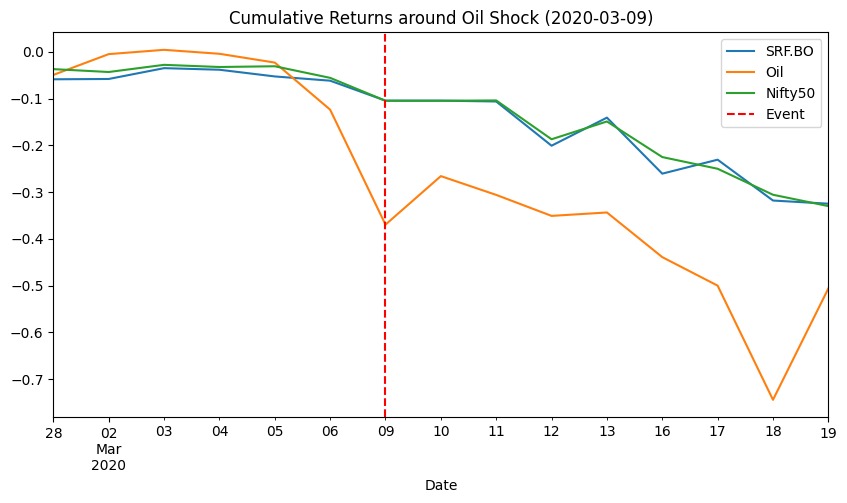

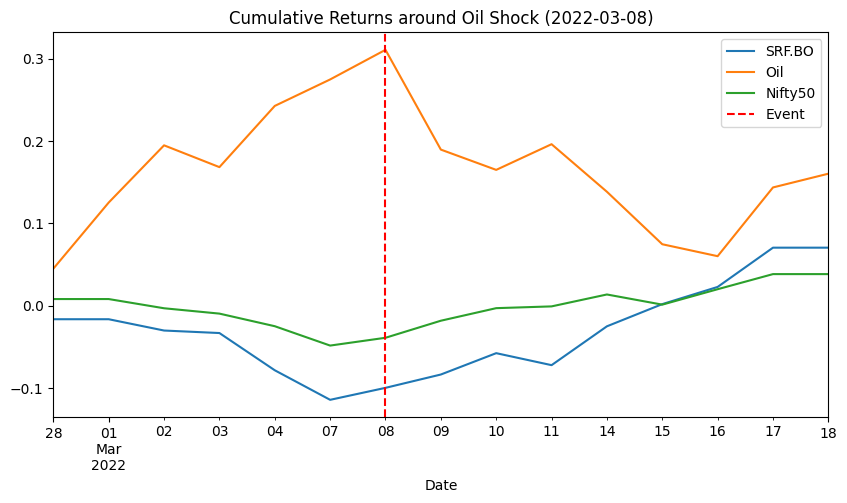

In [37]:
#SRF
event_dates = ["2020-03-09", "2022-03-08"]
window = 10

for event in event_dates:
    event = pd.to_datetime(event)
    window_data = returns.loc[event - pd.Timedelta(days=window):
                              event + pd.Timedelta(days=window), ["SRF.BO", "Oil","Nifty50"]]
    window_data.cumsum().plot(figsize=(10,5))
    plt.axvline(event, color='red', linestyle='--', label='Event')
    plt.title(f"Cumulative Returns around Oil Shock ({event.date()})")
    plt.legend()
    plt.show()



*   After 9th Mar 2020, cumulative return on SRF and Oil are declining. One potential reason was the COVID-19
*   However, after 8th Mar 2022 cumulative returns of oil is declining simultaneously SRF returns are increasing, potential reason is input cost for SRF will decline.



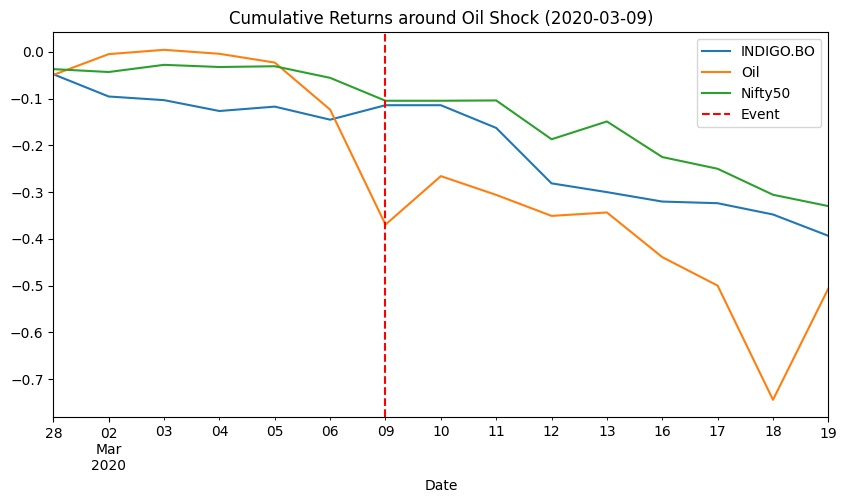

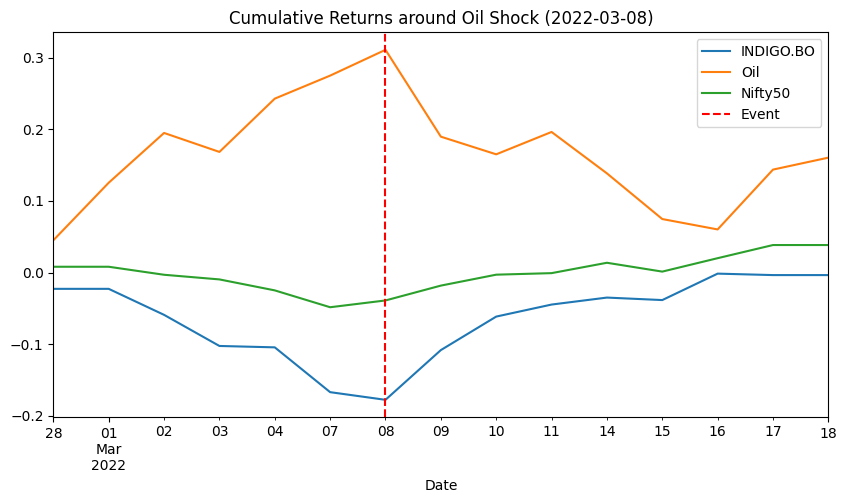

In [38]:
#Indigo
event_dates = ["2020-03-09", "2022-03-08"]
window = 10

for event in event_dates:
    event = pd.to_datetime(event)
    window_data = returns.loc[event - pd.Timedelta(days=window):
                              event + pd.Timedelta(days=window), ["INDIGO.BO", "Oil","Nifty50"]]
    window_data.cumsum().plot(figsize=(10,5))
    plt.axvline(event, color='red', linestyle='--', label='Event')
    plt.title(f"Cumulative Returns around Oil Shock ({event.date()})")
    plt.legend()
    plt.show()

*   Same effect like SRF can be seen here with INDIGO as well. (Around 30% of total operation cost is fuel cost)

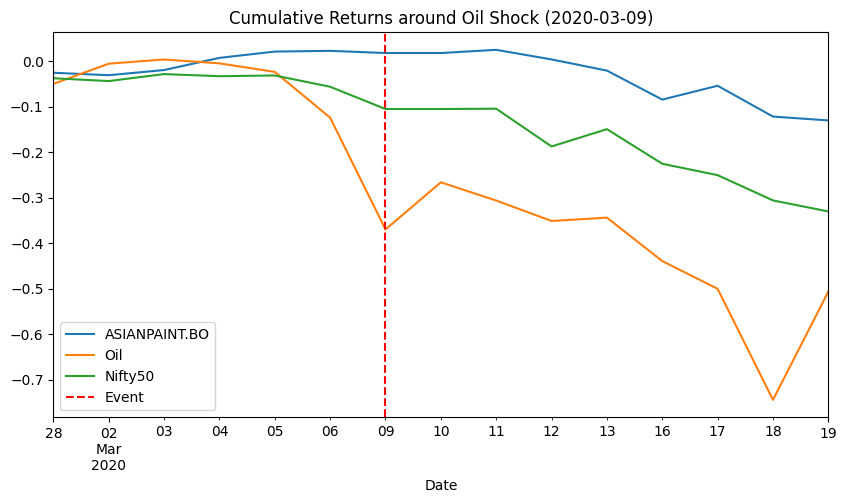

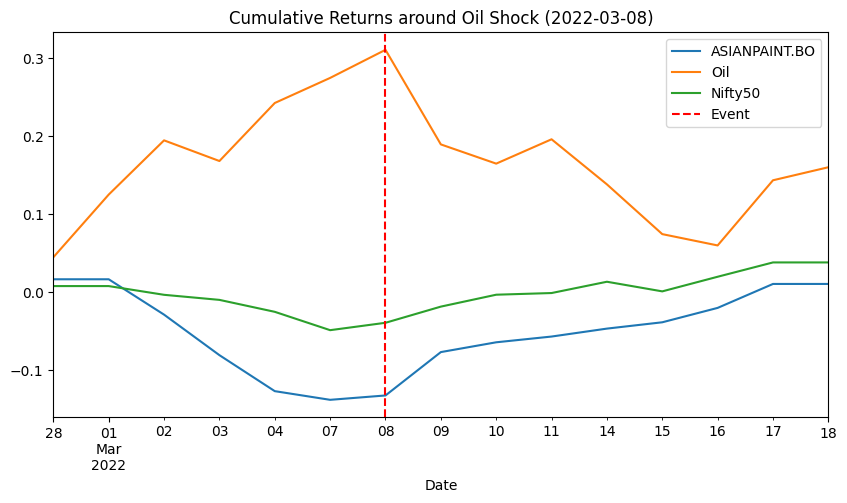

In [39]:
#Asian Paint
event_dates = ["2020-03-09", "2022-03-08"]
window = 10

for event in event_dates:
    event = pd.to_datetime(event)
    window_data = returns.loc[event - pd.Timedelta(days=window):
                              event + pd.Timedelta(days=window), ["ASIANPAINT.BO", "Oil","Nifty50"]]
    window_data.cumsum().plot(figsize=(10,5))
    plt.axvline(event, color='red', linestyle='--', label='Event')
    plt.title(f"Cumulative Returns around Oil Shock ({event.date()})")
    plt.legend()
    plt.show()

*   Negative correlation is observed in Asian Paints stock as well.

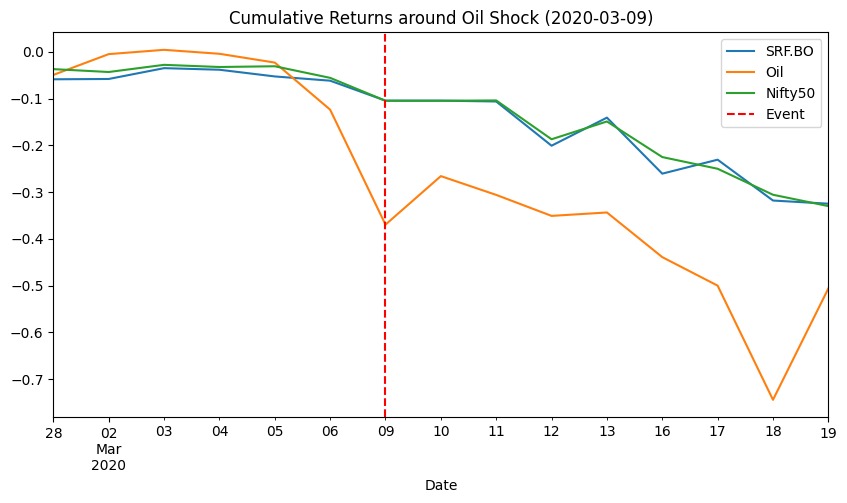

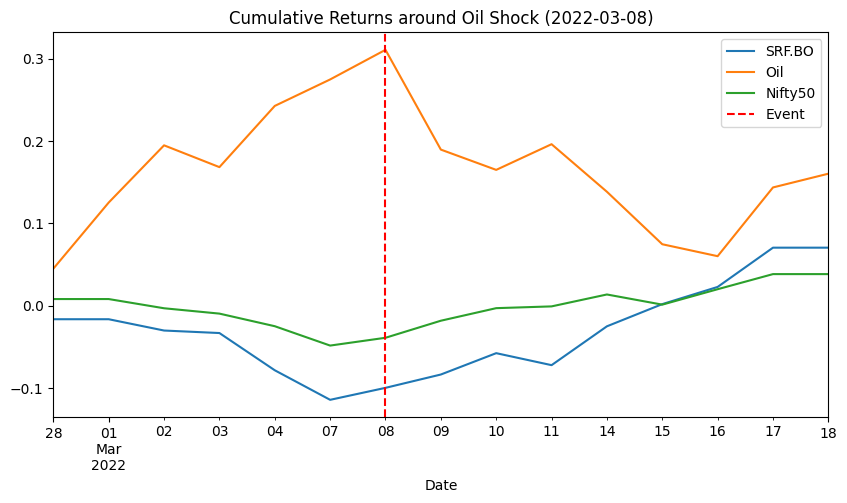

In [40]:
#SRF
event_dates = ["2020-03-09", "2022-03-08"]
window = 10

for event in event_dates:
    event = pd.to_datetime(event)
    window_data = returns.loc[event - pd.Timedelta(days=window):
                              event + pd.Timedelta(days=window), ["SRF.BO", "Oil","Nifty50"]]
    window_data.cumsum().plot(figsize=(10,5))
    plt.axvline(event, color='red', linestyle='--', label='Event')
    plt.title(f"Cumulative Returns around Oil Shock ({event.date()})")
    plt.legend()
    plt.show()

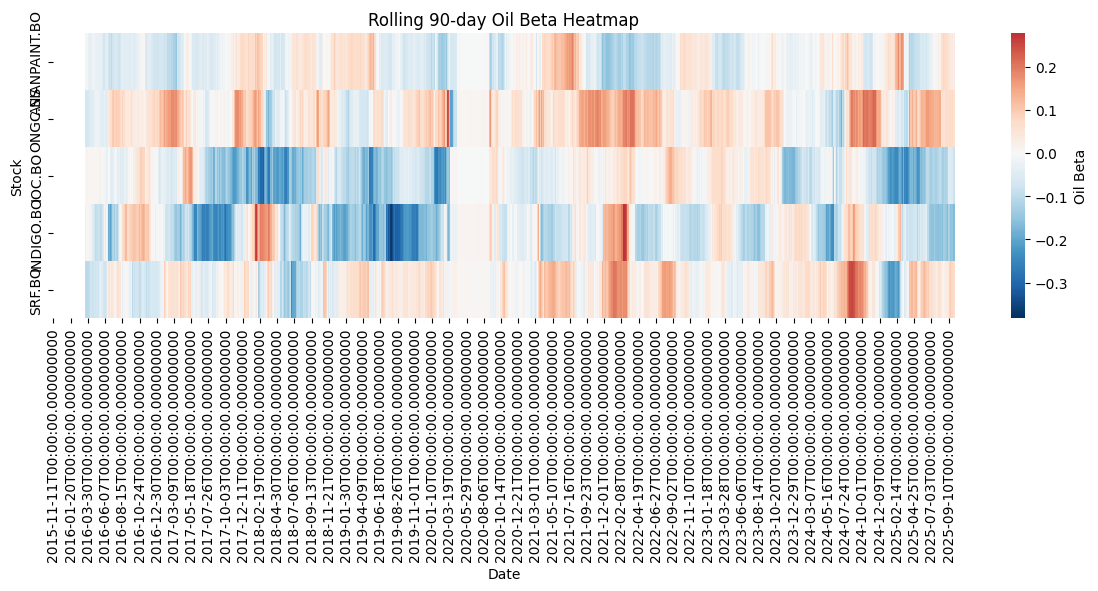

In [41]:
plt.figure(figsize=(12, 6))
sns.heatmap(rolling_betas.T, cmap="RdBu_r", center=0, annot=False, cbar_kws={'label': 'Oil Beta'})
plt.title("Rolling 90-day Oil Beta Heatmap")
plt.xlabel("Date")
plt.ylabel("Stock")
plt.tight_layout()
plt.show()

In [42]:
#Median of Rolling Correlation
avg_corr = {}
for stock in stocks:
    corr_series = rolling_corr.xs('Oil', level=1)[stock]
    avg_corr[stock] = corr_series.median()

avg_corr = pd.Series(avg_corr).sort_values()
print(avg_corr)

INDIGO.BO       -0.029741
IOC.BO          -0.002359
ASIANPAINT.BO   -0.001223
SRF.BO           0.073316
ONGC.NS          0.106883
dtype: float64


*   ONGC has highest positive correlation among all showcasing upstream oil sector.
*   Indigo, IOC, AsianPaint has negative correlation (all sector depends on the oil as input material)
*   However, calculations shows that there are no major correlation between oil and these stocks.